## SPRINT 8 - Visualizaciones en Python

Mailin Adriana Villan Villan <br>

Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

***


## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

***


** Preparacion del entorno

Lo primero que hice para realizar este spring fue actualizar pip e instalar varios paquetes en Python:

Con el primer import sys se proporcionan funciones y variables del sistema, se ejecuta el mismo intérprete de Python que está en uso<br> y se actualiza el gestor de paquetes de Python.

Con el segundo import sys, se instalan varios paquetes en Python para análisis de datos, visualización y conexión con MySQL.<br> Usa sys.executable para asegurar que los paquetes se instalen en la versión correcta de Python. 

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy ipywidgets squarify


Posteriormente importe las librerías necesarias para el manejo de los datos y la creación de gráficas que me permitan realizar los ejercicios.<br> Las librerías que utilizaré son:

Pandas: para la manipulación y análisis de datos.
Matplotlib: para la creación de gráficas.
Seaborn: para generar visualizaciones más estilizadas y facilitar el análisis estadístico.
Numpy: para realizar calculos matematicos y analizar los datos.
Widgets:para utilizar Widgets interactivos en Jupyter Notebook.
squarify: para crear treemaps y visualizar la distribución de datos de manera compacta y comparativa.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

** Configuración de la conexión en Python con MySQL Workbench. 

1. Instalar e importar las librerías mysql-connector para permitir la conexión.

2. Definir el método de conexión a MySQL. Para esto, utilicé mysql.connector para establecer una conexión con la BD y, si la conexión es exitosa, se realizan los siguientes pasos:
   ** Se muestra la version del servidor MySQL y el nombre de la BD, que en este caso es "transactions".
   ** Se Obtene una lista de las tablas<br>
   ** Se Itera sobre las tablas para poder crear los DataFrame de pandas con los datos obtenidos.

3. En el caso de que haya un error en la conexión, se muestra un mensaje indicando el problema. 

4. Finalmente, si la conexión sigue activa, se cierran tanto el cursor como la conexión para liberar los recursos.

In [ ]:
import mysql.connector # revisar si esto esta repetido y ver si lo quito del markdown anterior
from mysql.connector import Error

try:
    conexion_bd = mysql.connector.connect(host='localhost',
                                         database='transactions',
                                         user='root',
                                         password='root')
    pd.set_option("display.max.columns", None) 
    
    if conexion_bd.is_connected():
        db_Info = conexion_bd.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = conexion_bd.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        cursor = conexion_bd.cursor()
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]  

        for table in MySQL_tables:  
            cursor.execute(f"SELECT * FROM {table}") # Ejecuta la consulta "Select * From {tabla}" para extraer los datos de c/tabla
            columnas = [columna[0] for columna in cursor.description] # Obtención de lista de nombres de las columnas de la tabla 
            globals()[f'df_{table}'] = pd.DataFrame(cursor.fetchall(), columns=columnas) #Creación y nombramiento dinamico de pd.df
            print(f'df_{table}')
                      
           
except Error as e:
    print("Error while connecting to MySQL", e)
    
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  8.4.0
You're connected to database:  ('transactions',)
df_companies
df_credit_cards
df_estat_targetes
df_products
df_transactions
df_transactions_products
df_transation_num_product
df_users
MySQL connection is closed


** Revision de los datos de los dataframes

1. Verificar los tipos de datos de las columnas utilizando el método df_name.info(). 
  

2. Convertir los tipos de datos utilizando el método .astype() para las columnas adecuadas y el método to_datetime para los campos relacionados con fechas.
   * En el df_transactions cambie el tipo de dato a la columna amount, declined y timestamp, para extraer informacion temporal.
   * En el df_products cambie el tipo de dato a la columna price y weight

In [37]:
#df_transactions.info()
#df_products.info()
#df_companies.info()
#df_credit_cards.info()
#df_transactions_products.info()
#df_users.info()
#df_estat_targetes.info()

df_transactions = df_transactions.astype({'amount': float, 'declined': bool})
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp']) #cambiar formato de fecha 
df_products = df_products.astype({'price': float, 'weight': float})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    bool          
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
 10  year_month   587 non-null    period[M]     
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 46.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  --

** Ejercicio 1 <br>

** Una variable numérica.<br>

 Para este ejercicio seleccioné la variable numérica weight del DataFrame df_products y realice 2 graficos, de linea y de cajas.
 
 ** Lo que me llama la atención de graficar esta variable es: <br>
observar si el peso del producto es constante o variable. Esto me permitiria a posteriori y realizando otros analisis, si el peso del producto afecta a las ventas de los productos por el hecho de que el precio del envio del producto se puede ver incrementado cuando este es mas peasdo. 


 ** Justificación de la elección del gráfico <br>
En un primer momento realice un grafico de linea que me permitia ver la cantidad de productos con un mismo precio. Despues quice ademas observar la distribución del peso de los productos de forma más clara y detectar outliers, por lo que tambien realice el grafico de cajas.


** Explicación del código:<br>




** Interpretación de los resultados en función de los datos<br>

Para este ejercico asumo que la unidad del peso de los productos es el kilo. En la grafica se observa que el peso de los productos va desde 0.6 a 3.2 kilos. La cantidad de productos por precio varia entre 8 y 9 productos.
Tenemos 
0.6 a 0.80 
Hay nueve productos que pesan 1 kilo 

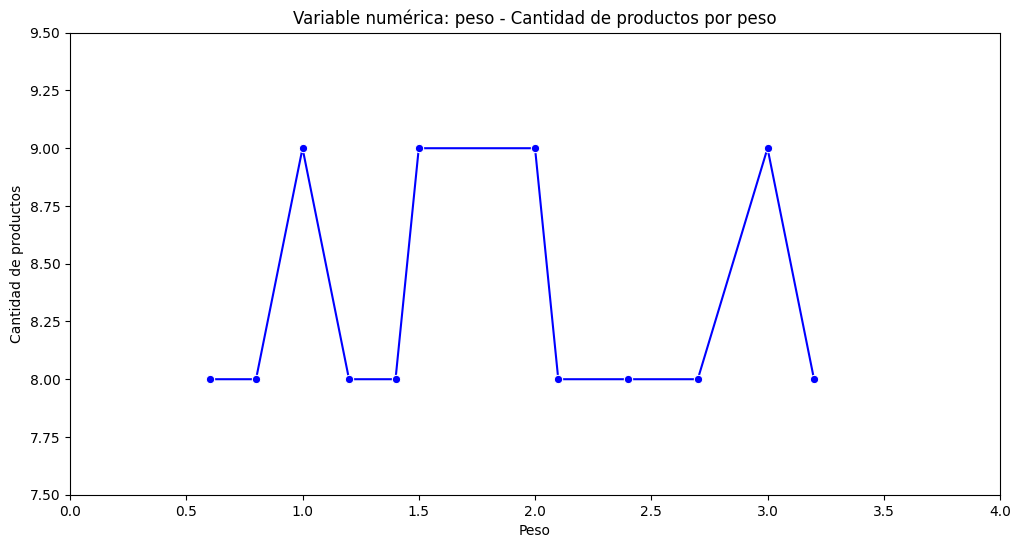

     id               product_name    price   colour  weight warehouse_id
0     1           Direwolf Stannis  $161.11  #7c7c7c     1.0         WH-4
1    10             Karstark Dorne  $119.52  #f4f4f4     2.4        WH--5
2   100                 south duel   $40.43  #6d6d6d     3.0       WH--95
3    11             Karstark Dorne   $49.70  #141414     2.7        WH--6
4    12              duel Direwolf  $181.60  #a8a8a8     2.1        WH--7
..  ...                        ...      ...      ...     ...          ...
95   95  riverlands north Direwolf    $6.90  #c1c1c1     2.7       WH--90
96   96                 dooku solo   $20.92  #282828     2.1       WH--91
97   97            jinn Winterfell   $65.25  #bababa     1.0       WH--92
98   98      Direwolf Littlefinger   $38.33  #bababa     2.0       WH--93
99   99                   the duel  $151.78  #212121     1.5       WH--94

[100 rows x 6 columns]


In [21]:
df_weight_counts = df_products['weight'].value_counts().reset_index()
df_weight_counts.columns = ['weight', 'count']  # Renombro las columnas para mayor claridad

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_weight_counts,
    x='weight',
    y='count',  
    marker='o',
    color='blue'
)

plt.title("Variable numérica: peso - Cantidad de productos por peso")
plt.xlabel("Peso")
plt.ylabel("Cantidad de productos")
plt.xlim(0,4)
plt.ylim(7.5,9.5)
plt.show()

print(df_products)


In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_products,
    x='weight',  # Variable numérica en el eje X
    color='blue'
)

plt.title("Distribución del peso de los productos")
plt.xlabel("Peso")
plt.show()

print(df_products)

** Ejercicio 2 <br>

** Dos variables numéricas.<br>
Para este ejercicio seleccioné las variables numéricas mes y declined del DataFrame df_transactions.

** Comenta lo que llama la atención de graficar esta variable
Graficar las variables numericas mes y declined, me permite observar la cantidad de veces en que las transacciones han dido declinadas por mes y detectar los meses con  mayor cantidad de transacciones declinadas. 

** Justificación de la elección del gráfico <br>
La grafica de barras me permite ver con facilidad cómo varía la frecuencia de las transacciones declinadas de un mes a otro, pues la altura de la barra refleja la cantidad, lo que es ideal para el análisis de tendencias y patrones. 

** Explicación del código:<br>

1. Cambio el formato de fecha
2. Extraigo el año y mes
3. Agrupo por mes y calculo la suma de las transacciones declinadas. El reset_index(), convierte el índice de la agrupacion en una columna regular y restablece el índice del DataFrame, lo que da como resultado un DataFrame con el mes y la cantidad total de transacciones declinadas para cada mes.
4. Convierto la columna year_month a formato texto.
5. Creo la grafica de barras usando sns.barplot.
6. Personalizo la apariencia del gráfico (rotación de etiquetas, ejes, título).
7. Muestro el gráfico final.

** Interpretación de los resultados en función de los datos<br>

Mayo de 2021 es el mes con mayor cantidad de transacciones declinadas (14) seguido por los meses de abril y junio del mismo año con 11 transacciones declinadas. Los meses de marzo y dicimbre de 2021 y enero de 2022 son los meses con menos cantidad de transacciones declinadas (3). 
Con esta informacion podria analizar en concreto las causas que han provocado la no aprobacion de las transacciones entre las que se pueden encontrar: una caida del sistema en el momento de realizar la compra y/o problemas tecnicos con la tarjeta de credito.


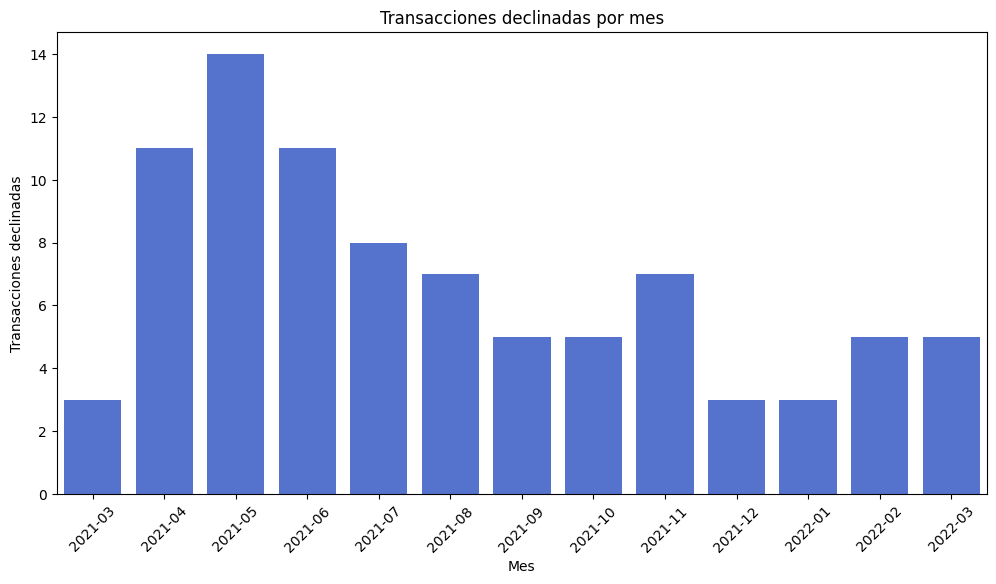

In [20]:
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp']) #cambiar formato de fecha 
df_transactions['year_month'] = df_transactions['timestamp'].dt.to_period('M') #extraer año y mes
df_monthly = df_transactions.groupby('year_month')['declined'].sum().reset_index() # agrupo la suma del amount por mes 
df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='declined', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Transacciones declinadas")
plt.title("Transacciones declinadas por mes")
plt.show()

** Ejercicio 3 <br>

** Una variable categórica.<br>
   Para este ejercicio he elegido la variable categorica country del DataFrame df_companies.

** Comenta lo que llama la atención de graficar esta variable<br>
   Graficar esta variable me permite observar la cantidad de empresas que hay en cada pais 



** Justificación de la elección del gráfico <br>
   He utilizado el grafico Treemap para el cual he tenido que instalar la libreria squarify 
   Muestra la distribución de empresas en distintos países, permitiendo visualizar rápidamente qué países tienen más o menos empresas mediante el tamaño de los rectángulos.
   
** Explicación del código:<br>

1. Cuenta cuántas empresas hay en cada país y lo almacena en un DataFrame.
2. Crea la figura del gráfico con un tamaño adecuado.
3. Dibuja el Treemap donde el tamaño de cada rectángulo representa la cantidad de empresas por país.
4. Añade título y oculta los ejes para mejorar la visualización.
5. Muestra el gráfico.

   He seleccionado del df companies para calcular la cantidad de empresas que hay por país

 -- agregar el número de empresas que hay en cada pais, que me salga el número


** Interpretación de los resultados en función de los datos<br>

1. 



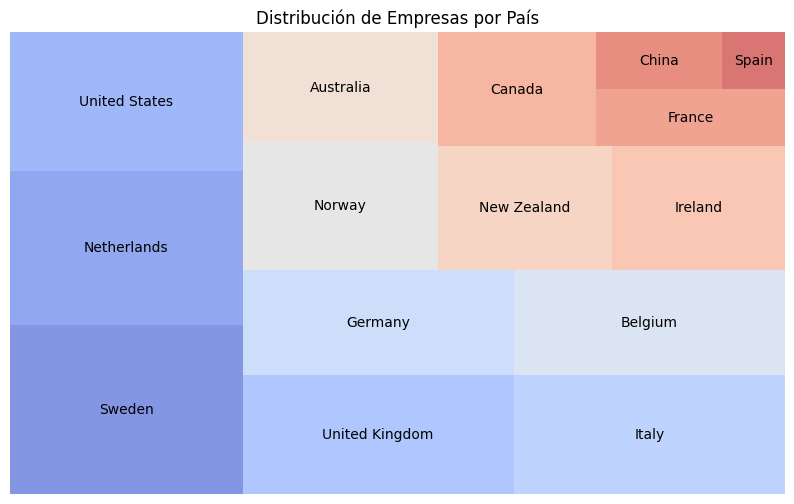

In [19]:
# Obtener la cantidad de empresas por país
df_country = df_companies['country'].value_counts().reset_index()
df_country.columns = ['country', 'count']

# Graficar Treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=df_country['count'], 
    label=df_country['country'], 
    alpha=0.7, 
    color=sns.color_palette("coolwarm", len(df_country))
)
plt.title("Distribución de Empresas por País")
plt.axis("off")  # Ocultar ejes
plt.show()

** Ejercicio 4 <br>

** Una variable categórica y una numérica.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

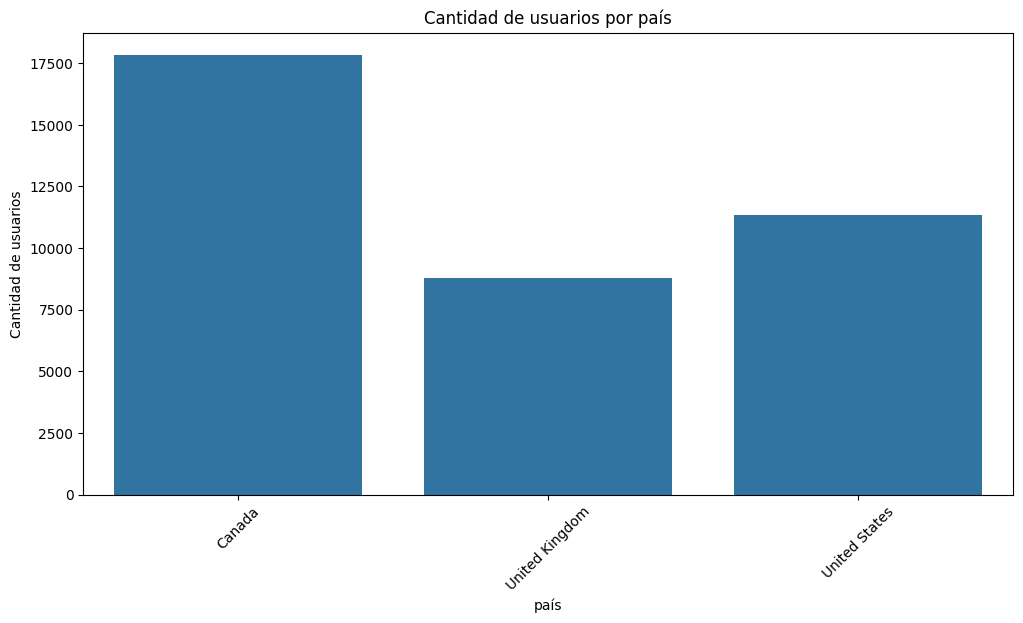

In [18]:
usuario_pais= df_users.groupby('country')['id'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=usuario_pais, x='country', y='id')

plt.xticks(rotation=45)
plt.xlabel("país")
plt.ylabel("Cantidad de usuarios")
plt.title("Cantidad de usuarios por país")
plt.show()

** Ejercicio 5 <br>

** Dos variables categóricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

C:\Users\formacio\AppData\Local\Temp\ipykernel_8560\1681595094.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


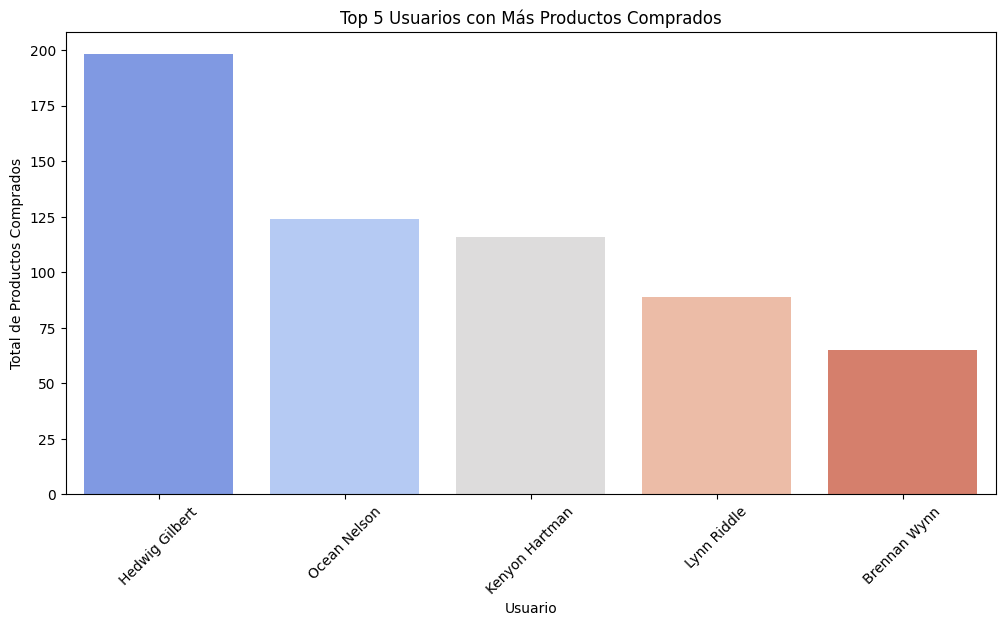

In [ ]:
# Unir transactions con transactions_products
df_total_productos = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='transaction_id')

# Unir con users
df_total_productos_1 = pd.merge(df_total_productos, df_users, left_on='user_id', right_on='id')

# Concatenar nombre y apellido en una nueva columna
df_total_productos_1['df_nombre_completo'] = df_total_productos_1['name'].fillna('') + " " + df_total_productos_1['surname'].fillna('')

# Agrupar solo por usuario y contar el total de productos comprados
df_usuario_total = df_total_productos_1.groupby('df_nombre_completo').size().reset_index(name='total_productos')

# Ordenar la columna total_productos de forma descendente y seleccionar los 5 usuarios con más productos comprados
df_usuario_top5 = df_usuario_total.sort_values(by='total_productos', ascending=False).head(5)

# Graficar los resultados
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_usuario_top5,
    x='df_nombre_completo',
    y='total_productos',
    palette="coolwarm"
)

plt.xticks(rotation=45)
plt.xlabel("Usuario")
plt.ylabel("Total de Productos Comprados")
plt.title("Top 5 Usuarios con más Productos Comprados")

plt.show()


** Ejercicio 6 <br>

** Tres variables.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

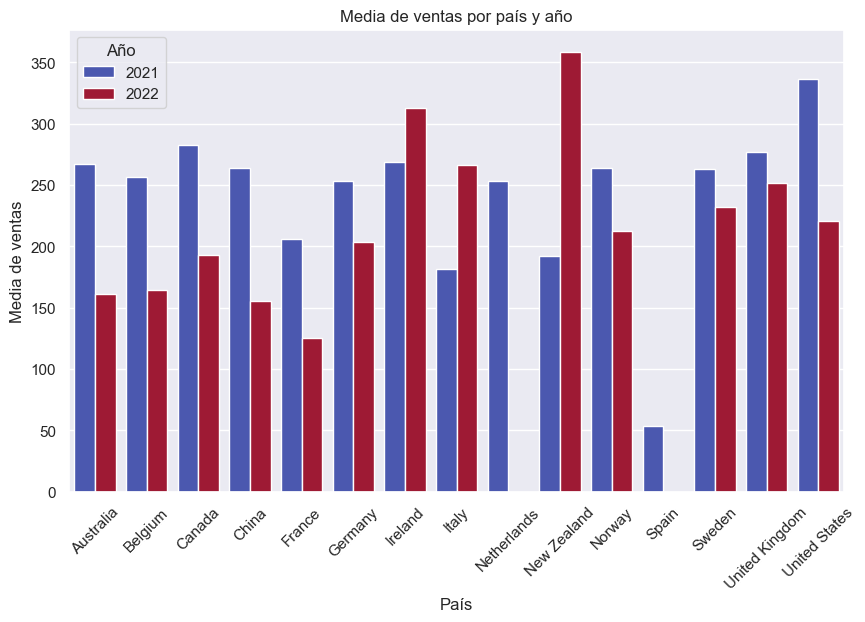

In [45]:
# Unir transactions con companies
df_transactions_companies = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

# Convertir la columna de timestamp a formato datetime
df_transactions_companies['timestamp'] = pd.to_datetime(df_transactions_companies['timestamp'])  

# Extraer el año
df_transactions_companies['year'] = df_transactions_companies['timestamp'].dt.year  

# Agrupar por país y año para calcular la media de las ventas
df_grouped = df_transactions_companies.groupby(['country', 'year'])['amount'].mean().reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped,
    x='country',
    y='amount',
    hue='year',
    palette="coolwarm"
)

plt.title('Media de ventas por país y año')
plt.xlabel('País')
plt.ylabel('Media de ventas')
plt.legend(title='Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si hay muchos países
plt.show()


** Ejercicio 7 <br>

** Graficar un Pairplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 1600x800 with 0 Axes>

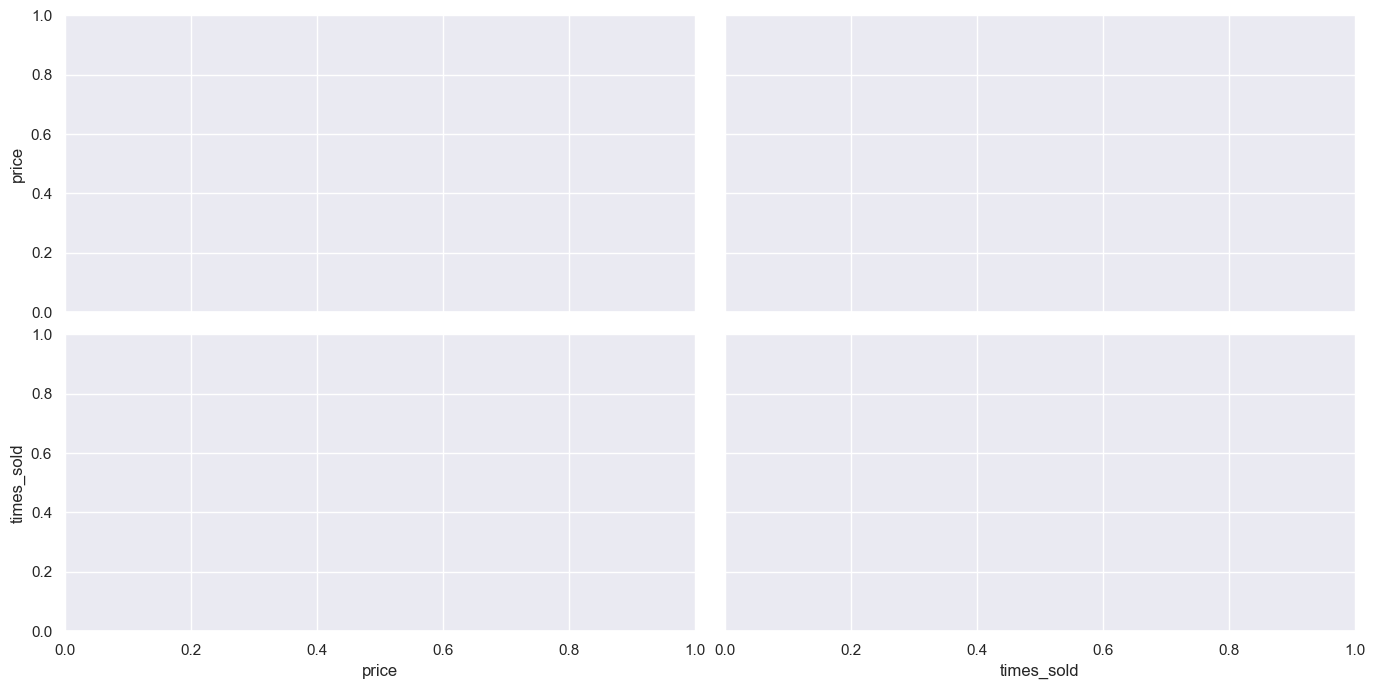

In [ ]:
# precio y veces q ha sido vendido
df_product_transactions_products = pd.merge(df_products, df_transactions_products, left_on='id', right_on='product_id', how='outer')
df_product_count = df_product_transactions_products.groupby(['id', 'price']).size().reset_index(name='times_sold')

plt.figure(figsize=(16, 8), layout="constrained")
sns.set_theme(style='darkgrid', palette='rocket')
ax = sns.pairplot(df_product_count, vars=['price', 'times_sold'], diag_kind='kde', height=3.5, aspect=2)
plt.suptitle('Relationship between product price and times it was sold', size=24, y=1.02)
for x in ax.axes.flatten():
    x.set_xlabel(x.get_xlabel(), fontsize=18)
    x.set_ylabel(x.get_ylabel(), fontsize=18)
    x.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

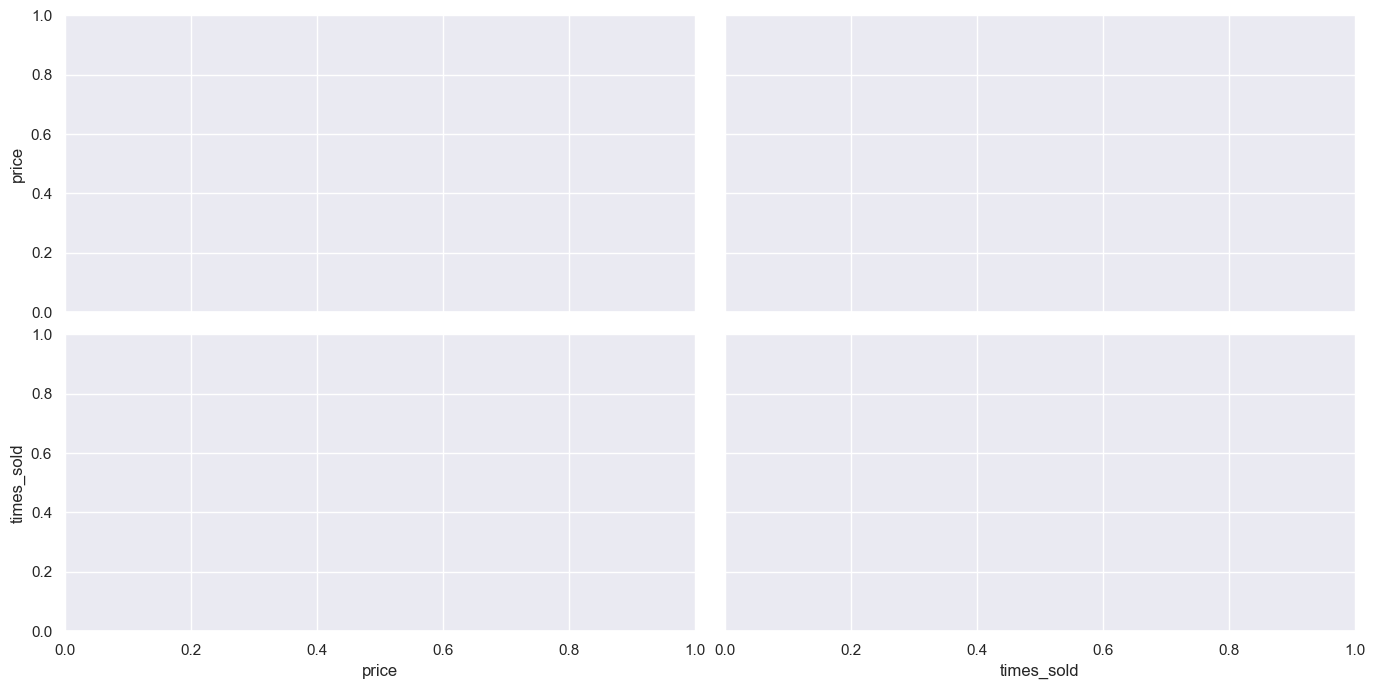

In [50]:
# Unir los DataFrames
df_product_transactions_products = pd.merge(df_products, df_transactions_products, left_on='id', right_on='product_id', how='outer')

# Agrupar por ID y precio para contar las veces que se vendió cada producto
df_product_count = df_product_transactions_products.groupby(['id', 'price']).size().reset_index(name='times_sold')

# Configurar Seaborn
sns.set_theme(style='darkgrid', palette='rocket')

# Crear el PairPlot
pairplot = sns.pairplot(df_product_count, vars=['price', 'times_sold'], diag_kind='kde', height=3.5, aspect=2)

# Ajustar etiquetas de los ejes
for ax in pairplot.axes.flatten():
    if ax is not None:  # Verifica que el eje no sea None
        ax.set_xlabel(ax.get_xlabel(), fontsize=18)
        ax.set_ylabel(ax.get_ylabel(), fontsize=18)
        ax.tick_params(axis='both', labelsize=12)

# Agregar título
plt.subplots_adjust(top=0.95)  # Ajustar espacio para el título
pairplot.fig.suptitle('Relationship between product price and times it was sold', size=24)

plt.show()


## Nivel 2
***
** Ejercicio 1 <br>

** Correlación de todas las variables numéricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


** Ejercicio 2 <br>

** Implementa un jointplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

## Nivel 3
***
** Ejercicio 1 <br>

** Implementa un violinplot combinado con otro tipo de gráfico.



** Explicación del código: <br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

** Ejercicio 2 <br>

** Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

In [ ]:
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\130331707.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


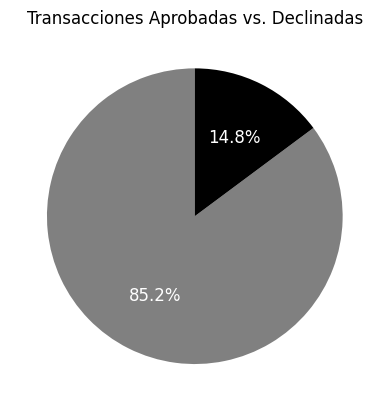

In [44]:
query = "SELECT declined FROM transactions;"
df = pd.read_sql(query, conexion_bd)

df_declined_counts = df['declined'].map({1: 'Declinadas', 0: 'Aprobadas'}).value_counts()
labels = df_declined_counts.index
colors = ['grey', 'black']

plt.pie(
    df_declined_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12} 
)
plt.title("Transacciones Aprobadas vs. Declinadas")
plt.show()

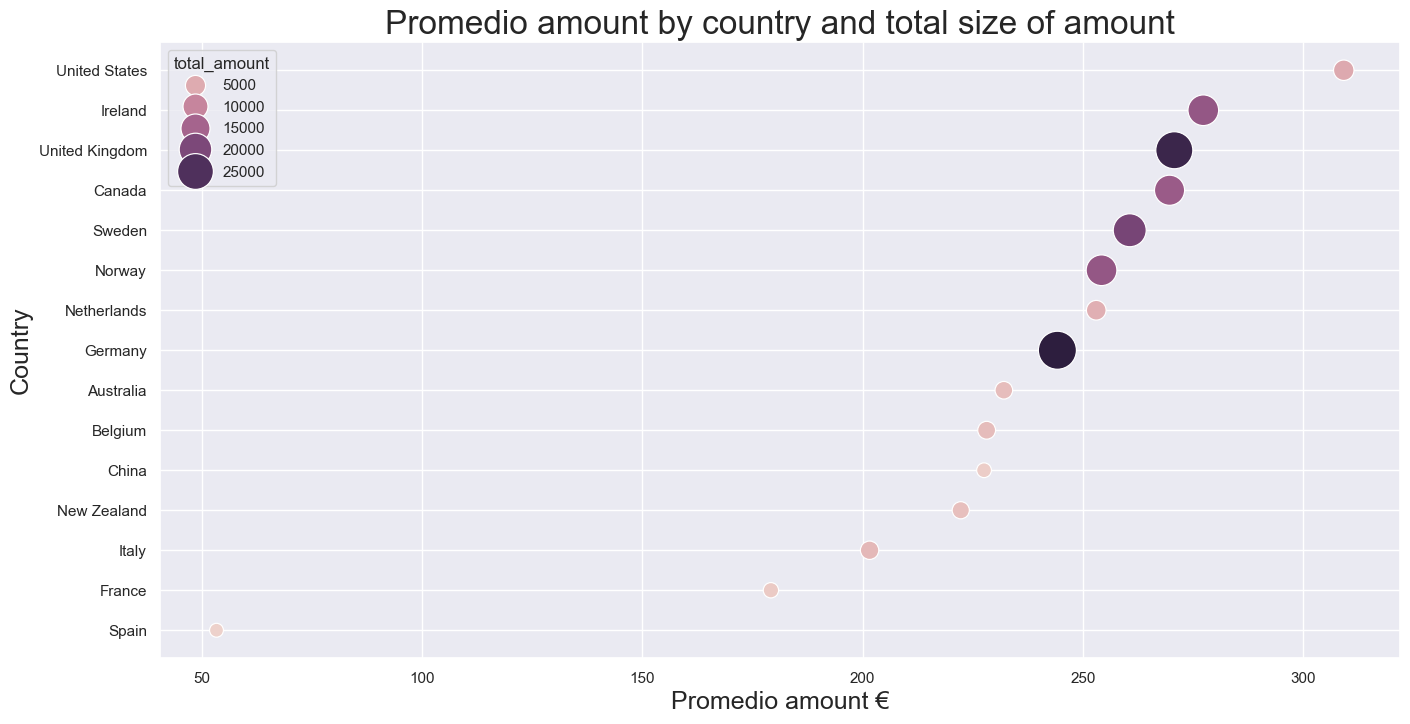

In [43]:
df_companies_transactions = pd.merge(df_companies, df_transactions, left_on='company_id', right_on='business_id', how='outer')
df_country_summary = df_companies_transactions.groupby('country').agg(average=('amount', 'mean'),total_amount=('amount', 'sum')).sort_values(by='average', ascending=False).reset_index()

plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid', palette='twilight_r')
ax = sns.scatterplot(data=df_country_summary, x='average', y='country', hue='total_amount', size='total_amount', sizes=(100,750))
plt.title('Promedio amount by country and total size of amount', size=24)
plt.xlabel('Promedio amount €', size=18)
plt.ylabel('Country', size=18)
plt.show()